# Isolation Forest
* 異常検知のための決定木を使ったアンサンブル学習であり、教師なし学習の手法
* 決定木を各データが孤立するまで繰り返し孤立するまでの距離から異常値を推定する
* 参考(https://qiita.com/tchih11/items/d76a106e742eb8d92fb4)

In [11]:
#以下がIsolationForestに必要なコード
from sklearn.ensemble import IsolationForest

import pandas as pd
import numpy as np
import seaborn as sns

### データの生成
* 異常値と正常値のデータを生成する

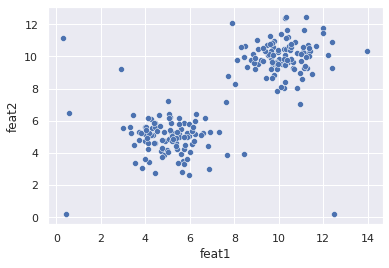

In [6]:
sns.set()
np.random.seed(10)

# 平均と分散
mean1 = np.array([10, 10])
mean2 = np.array([5, 5])
cov = np.array([[1, 0], [0, 1]])

# 正常データの生成(2つの正規分布から生成)
norm1 = np.random.multivariate_normal(mean1, cov, size=100)
norm2 = np.random.multivariate_normal(mean2, cov, size=100)

# 異常データの生成(一様分布から生成)
lower, upper = 0, 15
anom = (upper - lower)*np.random.rand(10, 2) + lower

df = np.vstack([norm1, norm2, anom])
df = pd.DataFrame(df, columns=["feat1", "feat2"])

# 可視化
sns.scatterplot(x="feat1", y="feat2", data=df)

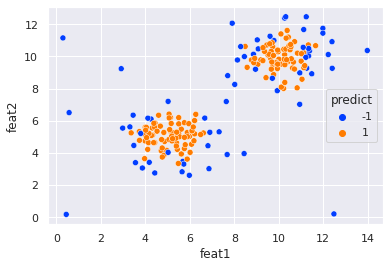

In [10]:
#IsolationForestの設定
#n_estimators:決定技の数
#random_state:乱数シード
IF = IsolationForest(n_estimators=100, random_state=123)

#IsolationForestの実行
IF.fit(df)
df["predict"] = IF.predict(df)

# 可視化
#正常値はオレンジ、異常値は青色で表示
sns.scatterplot(x="feat1", y="feat2", data=df, hue='predict', palette='bright')